In [1]:
# Nahush Code 

import pandas as pd

# Load the dataset
file_path = 'Brain_stroke_dataset.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to identify the categorical features
df.head()


gender    age  hypertension  heart_disease ever_married      work_type  \
0  Female  65.00             1              0          Yes        Private   
1  Female  11.00             0              0           No       children   
2    Male   1.56             0              0           No       children   
3  Female  49.00             0              0          Yes  Self-employed   
4  Female  49.00             1              0          Yes       Govt_job   

  Residence_type  avg_glucose_level   bmi smoking_status  stroke  
0          Urban             180.76  26.9        Unknown       0  
1          Rural              93.51  20.8        Unknown       0  
2          Rural              93.74  20.1        Unknown       0  
3          Rural              68.44  23.0         smokes       0  
4          Rural             107.91  25.0        Unknown       0

In [2]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Create a new DataFrame to store the encoded data
encodedvalue = df.copy()

# Loop through each categorical column and perform label encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    encodedvalue[col] = le.fit_transform(df[col])

# Show the first few rows of the encoded DataFrame
encodedvalue.head()


gender    age  hypertension  heart_disease  ever_married  work_type  \
0       0  65.00             1              0             1          1   
1       0  11.00             0              0             0          3   
2       1   1.56             0              0             0          3   
3       0  49.00             0              0             1          2   
4       0  49.00             1              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             180.76  26.9               0       0  
1               0              93.51  20.8               0       0  
2               0              93.74  20.1               0       0  
3               0              68.44  23.0               3       0  
4               0             107.91  25.0               0       0

In [5]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the dataset into training and testing sets (80-20), stratified by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 10), (200, 10), (800,), (200,))

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Identify categorical columns for encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Encode categorical columns in both training and testing sets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
for col in categorical_cols:
    X_train_encoded[col] = le.fit_transform(X_train[col])
    X_test_encoded[col] = le.transform(X_test[col])

# Display the first few rows of the encoded training set
X_train_encoded.head()


gender   age  hypertension  heart_disease  ever_married  work_type  \
673       1  49.0             0              0             1          1   
574       1  62.0             0              0             1          1   
652       0  62.0             0              0             1          1   
750       0  39.0             0              0             1          1   
635       0  78.0             0              0             1          2   

     Residence_type  avg_glucose_level   bmi  smoking_status  
673               1              79.51  37.8               2  
574               1              72.50  22.5               1  
652               0              83.85  24.5               2  
750               1              78.24  28.6               0  
635               1              56.95  26.0               0

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
clfrf = RandomForestClassifier(random_state=42)

# Initialize RFE with the estimator and the number of features to select
rfe = RFE(estimator=clfrf, n_features_to_select=1, step=1)

# Fit RFE
rfe = rfe.fit(X_train_encoded, y_train)

# Get the ranking of features
ranking = rfe.ranking_

# Create a DataFrame to display feature ranking
feature_ranking_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Rank': ranking
}).sort_values(by='Rank')

feature_ranking_df


Feature  Rank
7  avg_glucose_level     1
8                bmi     2
1                age     3
9     smoking_status     4
3      heart_disease     5
5          work_type     6
6     Residence_type     7
2       hypertension     8
0             gender     9
4       ever_married    10

In [ ]:
    # Average Glucose Level (avg_glucose_level)
    # Body Mass Index (bmi)
    # Age (age)
    # Smoking Status (smoking_status)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Select the top 4 features
top_features = ['avg_glucose_level', 'bmi', 'age', 'smoking_status']
X_train_top = X_train_encoded[top_features]
X_test_top = X_test_encoded[top_features]

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize a dictionary to store performance metrics
pmetrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Loop through each classifier to train, perform k-fold cross-validation, and evaluate metrics
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train_top, y_train)
    
    # Perform k-fold cross-validation and get mean accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X_train_top, y_train, cv=10))
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_top)
    
    # Calculate probability for ROC AUC
    y_prob = clf.predict_proba(X_test_top)[:, 1]
    
    # Calculate other metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store the metrics
    pmetrics['Accuracy'].append(cv_accuracy)
    pmetrics['Precision'].append(precision)
    pmetrics['Recall'].append(recall)
    pmetrics['F1 Score'].append(f1)
    pmetrics['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics
performance_df = pd.DataFrame(metrics, index=classifiers.keys())
performance_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression   0.94500      0.000  0.000000  0.000000  0.943723
SVM                   0.94500      0.000  0.000000  0.000000  0.658009
Random Forest         0.94125      0.000  0.000000  0.000000  0.930255
Naive Bayes           0.91750      0.125  0.090909  0.105263  0.891294

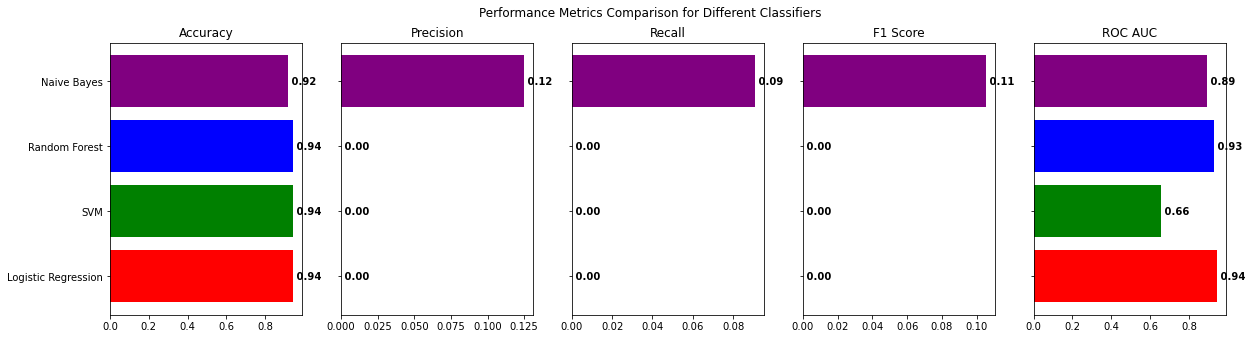

In [11]:
# Create a colorful bar plot for better visualization
colors = ['red', 'green', 'blue', 'purple']

# Set up the subplots
fig, axs = plt.subplots(1, len(metrics_list), figsize=(20, 5), sharey=True)

# Create bar plots for each metric
for i, metric in enumerate(metrics_list):
    axs[i].barh(labels, metrics[metric], color=colors)
    axs[i].set_title(metric)
    for j, v in enumerate(metrics[metric]):
        axs[i].text(v, j, " {:.2f}".format(v), color='black', va='center', fontweight='bold')

plt.suptitle('Performance Metrics Comparison for Different Classifiers')
plt.show()


In [ ]:
# 

In [ ]:
# ALL features 

In [12]:
# Initialize a new dictionary to store performance metrics for all features
pmetrics_all_features = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Loop through each classifier to train, perform k-fold cross-validation, and evaluate metrics
for name, clf in classifiers.items():
    # Fit the model using all features
    clf.fit(X_train_encoded, y_train)
    
    # Perform k-fold cross-validation and get mean accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X_train_encoded, y_train, cv=10))
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_encoded)
    
    # Calculate probability for ROC AUC
    y_prob = clf.predict_proba(X_test_encoded)[:, 1]
    
    # Calculate other metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store the metrics
    pmetrics_all_features['Accuracy'].append(cv_accuracy)
    pmetrics_all_features['Precision'].append(precision)
    pmetrics_all_features['Recall'].append(recall)
    pmetrics_all_features['F1 Score'].append(f1)
   pmetrics_all_features['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics for all features
performance_all_features_df = pd.DataFrame(metrics_all_features, index=classifiers.keys())
performance_all_features_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression    0.9425   0.500000  0.090909  0.153846  0.934584
SVM                    0.9450   0.000000  0.000000  0.000000  0.496392
Random Forest          0.9425   1.000000  0.090909  0.166667  0.884079
Naive Bayes            0.8700   0.190476  0.363636  0.250000  0.820587

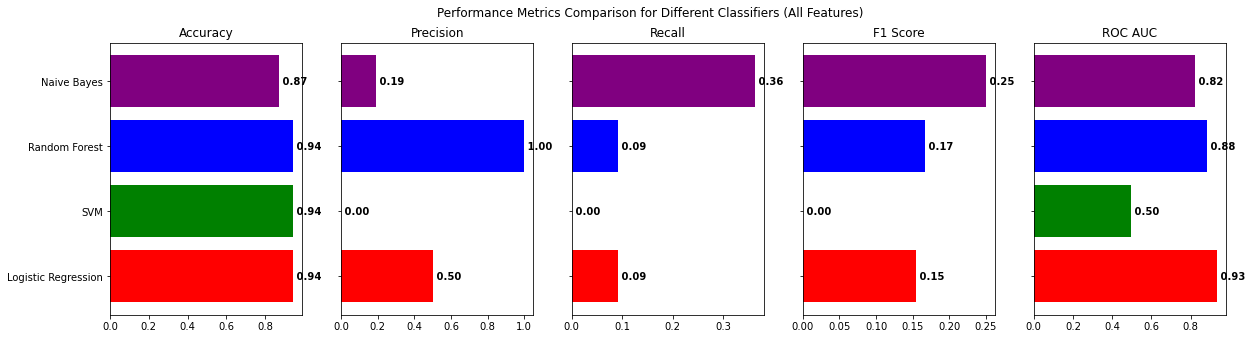

In [13]:
# Plotting the performance metrics in a colorful bar plot for the models trained with all features
colors = ['red', 'green', 'blue', 'purple']

# Set up the subplots
fig, axs = plt.subplots(1, len(metrics_list), figsize=(20, 5), sharey=True)

# Create bar plots for each metric
for i, metric in enumerate(metrics_list):
    axs[i].barh(labels, metrics_all_features[metric], color=colors)
    axs[i].set_title(metric)
    for j, v in enumerate(metrics_all_features[metric]):
        axs[i].text(v, j, " {:.2f}".format(v), color='black', va='center', fontweight='bold')

plt.suptitle('Performance Metrics Comparison for Different Classifiers (All Features)')
plt.show()


In [ ]:
# FOrward selection

In [14]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize Logistic Regression Classifier
logistic_clf = LogisticRegression()

# Initialize Forward Feature Selector with Logistic Regression as the estimator
forward_selector = SequentialFeatureSelector(logistic_clf, n_features_to_select=None, direction='forward')

# Fit the Forward Selector to the data
forward_selector = forward_selector.fit(X_train_encoded, y_train)

# Get the mask for selected features
selected_features_mask = forward_selector.get_support()

# Extract the selected feature names
selected_features_forward = X_train_encoded.columns[selected_features_mask]

# Display the selected features
selected_features_forward.tolist()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


['gender', 'age', 'hypertension', 'ever_married', 'work_type']

In [15]:
# Initialize a new dictionary to store performance metrics for selected features from Forward Selection
fs_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Subset the training and testing data to include only the selected features
X_train_forward = X_train_encoded[selected_features_forward]
X_test_forward = X_test_encoded[selected_features_forward]

# Loop through each classifier to train, perform k-fold cross-validation, and evaluate metrics
for name, clf in classifiers.items():
    # Fit the model using selected features
    clf.fit(X_train_forward, y_train)
    
    # Perform k-fold cross-validation and get mean accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X_train_forward, y_train, cv=10))
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_forward)
    
    # Calculate probability for ROC AUC
    y_prob = clf.predict_proba(X_test_forward)[:, 1]
    
    # Calculate other metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store the metrics
    fs_metrics['Accuracy'].append(cv_accuracy)
    fs_metrics['Precision'].append(precision)
    fs_metrics['Recall'].append(recall)
    fs_metrics['F1 Score'].append(f1)
    fs_metrics['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics for selected features
performance_forward = pd.DataFrame(fs_metrics, index=classifiers.keys())
performance_forward


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression   0.94375   0.000000  0.000000  0.000000  0.916787
SVM                   0.94500   0.000000  0.000000  0.000000  0.702742
Random Forest         0.91500   0.200000  0.090909  0.125000  0.891294
Naive Bayes           0.87875   0.153846  0.181818  0.166667  0.789322

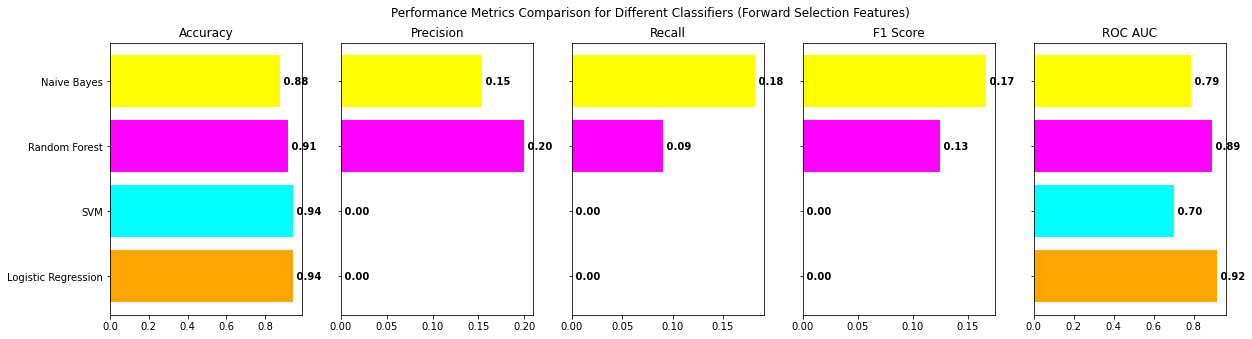

In [16]:
# Plotting the performance metrics in a colorful bar plot for the models trained with selected features from Forward Selection
colors = ['orange', 'cyan', 'magenta', 'yellow']

# Set up the subplots
fig, axs = plt.subplots(1, len(metrics_list), figsize=(20, 5), sharey=True)

# Create bar plots for each metric
for i, metric in enumerate(metrics_list):
    axs[i].barh(labels, fs_metrics[metric], color=colors)
    axs[i].set_title(metric)
    for j, v in enumerate(fs_metrics[metric]):
        axs[i].text(v, j, " {:.2f}".format(v), color='black', va='center', fontweight='bold')

plt.suptitle('Performance Metrics Comparison for Different Classifiers (Forward Selection Features)')
plt.show()


In [ ]:
# Backward selection

In [ ]:
# Initialize Backward Feature Selector with Logistic Regression as the estimator
backward_selector = SequentialFeatureSelector(logistic_clf, n_features_to_select=None, direction='backward')

# Fit the Backward Selector to the data
backward_selector = backward_selector.fit(X_train_encoded, y_train)

# Get the mask for selected features
selected_features_mask_backward = backward_selector.get_support()

# Extract the selected feature names
selected_features_backward = X_train_encoded.columns[selected_features_mask_backward]

# Display the selected features from Backward Selection
selected_features_backward.tolist()


In [ ]:
# ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

In [18]:
# Initialize a new dictionary to store performance metrics for selected features from Backward Selection
metrics_backward_selection = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Subset the training and testing data to include only the selected features from Backward Selection
X_train_backward = X_train_encoded[selected_features_backward]
X_test_backward = X_test_encoded[selected_features_backward]

# Loop through each classifier to train, perform k-fold cross-validation, and evaluate metrics
for name, clf in classifiers.items():
    # Fit the model using selected features
    clf.fit(X_train_backward, y_train)
    
    # Perform k-fold cross-validation and get mean accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X_train_backward, y_train, cv=10))
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test_backward)
    
    # Calculate probability for ROC AUC
    y_prob = clf.predict_proba(X_test_backward)[:, 1]
    
    # Calculate other metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store the metrics
    metrics_backward_selection['Accuracy'].append(cv_accuracy)
    metrics_backward_selection['Precision'].append(precision)
    metrics_backward_selection['Recall'].append(recall)
    metrics_backward_selection['F1 Score'].append(f1)
    metrics_backward_selection['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics for selected features from Backward Selection
performance_backward_selection_df = pd.DataFrame(metrics_backward_selection, index=classifiers.keys())
performance_backward_selection_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression   0.94625   1.000000  0.090909  0.166667  0.760462
SVM                   0.94500   0.000000  0.000000  0.000000  0.560847
Random Forest         0.94000   0.000000  0.000000  0.000000  0.521645
Naive Bayes           0.90375   0.214286  0.272727  0.240000  0.765272

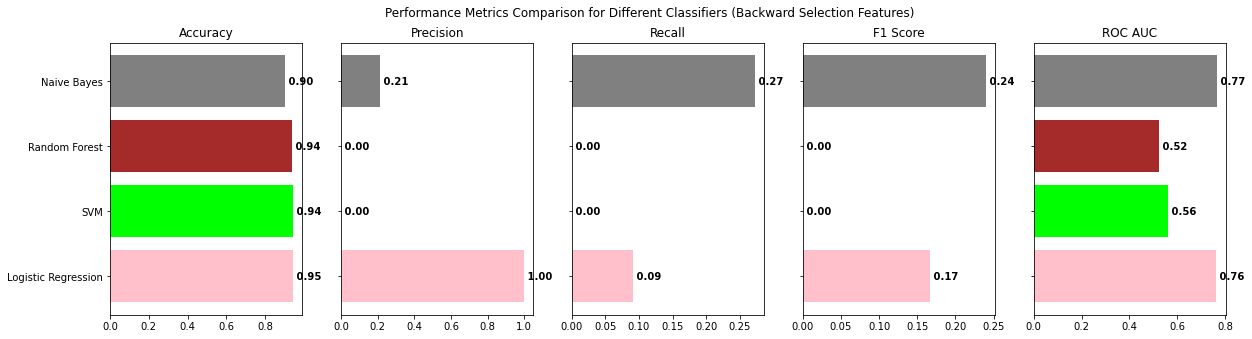

In [19]:
# Plotting the performance metrics in a colorful bar plot for the models trained with selected features from Backward Selection
colors = ['pink', 'lime', 'brown', 'grey']

# Set up the subplots
fig, axs = plt.subplots(1, len(metrics_list), figsize=(20, 5), sharey=True)

# Create bar plots for each metric
for i, metric in enumerate(metrics_list):
    axs[i].barh(labels, metrics_backward_selection[metric], color=colors)
    axs[i].set_title(metric)
    for j, v in enumerate(metrics_backward_selection[metric]):
        axs[i].text(v, j, " {:.2f}".format(v), color='black', va='center', fontweight='bold')

plt.suptitle('Performance Metrics Comparison for Different Classifiers (Backward Selection Features)')
plt.show()


In [ ]:
# Dataset is imbalanced where mostly points belongs to the 0 class here . that's why we are getting values for accuracy and ROC AUC do more reasearch about accuracy and ROC and AUC 